In [56]:
import nltk

nltk.download("inaugural")
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [57]:
presidents = [fileid[:-4] for fileid in inaugural.fileids()]

for index, president in enumerate(presidents):
    print(f"{index}: {president}")


0: 1789-Washington
1: 1793-Washington
2: 1797-Adams
3: 1801-Jefferson
4: 1805-Jefferson
5: 1809-Madison
6: 1813-Madison
7: 1817-Monroe
8: 1821-Monroe
9: 1825-Adams
10: 1829-Jackson
11: 1833-Jackson
12: 1837-VanBuren
13: 1841-Harrison
14: 1845-Polk
15: 1849-Taylor
16: 1853-Pierce
17: 1857-Buchanan
18: 1861-Lincoln
19: 1865-Lincoln
20: 1869-Grant
21: 1873-Grant
22: 1877-Hayes
23: 1881-Garfield
24: 1885-Cleveland
25: 1889-Harrison
26: 1893-Cleveland
27: 1897-McKinley
28: 1901-McKinley
29: 1905-Roosevelt
30: 1909-Taft
31: 1913-Wilson
32: 1917-Wilson
33: 1921-Harding
34: 1925-Coolidge
35: 1929-Hoover
36: 1933-Roosevelt
37: 1937-Roosevelt
38: 1941-Roosevelt
39: 1945-Roosevelt
40: 1949-Truman
41: 1953-Eisenhower
42: 1957-Eisenhower
43: 1961-Kennedy
44: 1965-Johnson
45: 1969-Nixon
46: 1973-Nixon
47: 1977-Carter
48: 1981-Reagan
49: 1985-Reagan
50: 1989-Bush
51: 1993-Clinton
52: 1997-Clinton
53: 2001-Bush
54: 2005-Bush
55: 2009-Obama
56: 2013-Obama
57: 2017-Trump
58: 2021-Biden


In [58]:
import nltk
from nltk.corpus import inaugural

nltk.download("inaugural")

roosevelt_speeches = [
    inaugural.sents(fileid) for fileid in inaugural.fileids() if "Roosevelt" in fileid
]
obama_speeches = [inaugural.sents(fileid) for fileid in inaugural.fileids() if "Obama" in fileid]

roosevelt_sents = [sent for speech in roosevelt_speeches for sent in speech]
obama_sents = [sent for speech in obama_speeches for sent in speech]

print("Roosevelt speeches: ", len(roosevelt_sents))
for sent in roosevelt_sents:
    print(sent)

Roosevelt speeches:  308
['My', 'fellow', 'citizens', ',', 'no', 'people', 'on', 'earth', 'have', 'more', 'cause', 'to', 'be', 'thankful', 'than', 'ours', ',', 'and', 'this', 'is', 'said', 'reverently', ',', 'in', 'no', 'spirit', 'of', 'boastfulness', 'in', 'our', 'own', 'strength', ',', 'but', 'with', 'gratitude', 'to', 'the', 'Giver', 'of', 'Good', 'who', 'has', 'blessed', 'us', 'with', 'the', 'conditions', 'which', 'have', 'enabled', 'us', 'to', 'achieve', 'so', 'large', 'a', 'measure', 'of', 'well', '-', 'being', 'and', 'of', 'happiness', '.']
['To', 'us', 'as', 'a', 'people', 'it', 'has', 'been', 'granted', 'to', 'lay', 'the', 'foundations', 'of', 'our', 'national', 'life', 'in', 'a', 'new', 'continent', '.']
['We', 'are', 'the', 'heirs', 'of', 'the', 'ages', ',', 'and', 'yet', 'we', 'have', 'had', 'to', 'pay', 'few', 'of', 'the', 'penalties', 'which', 'in', 'old', 'countries', 'are', 'exacted', 'by', 'the', 'dead', 'hand', 'of', 'a', 'bygone', 'civilization', '.']
['We', 'have', 

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [59]:
print("Obama speeches: ", len(obama_sents))
for sent in obama_sents:
    print(sent)


Obama speeches:  204
['My', 'fellow', 'citizens', ':']
['I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.']
['I', 'thank', 'President', 'Bush', 'for', 'his', 'service', 'to', 'our', 'nation', ',', 'as', 'well', 'as', 'the', 'generosity', 'and', 'cooperation', 'he', 'has', 'shown', 'throughout', 'this', 'transition', '.']
['Forty', '-', 'four', 'Americans', 'have', 'now', 'taken', 'the', 'presidential', 'oath', '.']
['The', 'words', 'have', 'been', 'spoken', 'during', 'rising', 'tides', 'of', 'prosperity', 'and', 'the', 'still', 'waters', 'of', 'peace', '.']
['Yet', ',', 'every', 'so', 'often', 'the', 'oath', 'is', 'taken', 'amidst', 'gathering', 'clouds', 'and', 'raging', 'storms', '.']
['At', 'these', 'moments', ',', 'America', 'has', 'carried', 'on', 'not', 'simply', 'because', 'of', 'the', 'skill', 'or', 'vis

In [60]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for sent in roosevelt_sents + obama_sents:
    all_tags.update(fc.all_pos_frequency(sent).keys())

print(all_tags)

{'PRP$', 'NNS', 'TO', 'CD', 'RBR', 'VB', 'SYM', 'VBD', 'MD', 'WDT', 'JJ', 'JJS', 'NN', '.', 'PRP', 'RB', "''", 'POS', 'RP', ',', 'WP$', 'EX', 'VBP', ':', 'RBS', 'JJR', 'VBN', 'VBG', 'DT', 'NNPS', 'PDT', 'WP', 'WRB', 'CC', 'VBZ', 'NNP', 'IN'}


In [61]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator()
data = []
correctness = []

for r_sent in roosevelt_sents:
    x, y = dg.generate_dataset(r_sent, all_tags, False)
    data.append(x)
    correctness.append(y)

for o_sent in obama_sents:
    x, y = dg.generate_dataset(o_sent, all_tags, True)
    data.append(x)
    correctness.append(y)

columns = list(all_tags) + [
    "Word variation",
    "Uncommon_word_frequency",
    "sentence_length",
]

df = pd.DataFrame(data, columns=columns)
nd_correctness = np.array(correctness)

display(df.head(10))

,PRP$,NNS,TO,CD,RBR,VB,SYM,VBD,MD,WDT,...,PDT,WP,WRB,CC,VBZ,NNP,IN,Word variation,Uncommon_word_frequency,sentence_length
0,0.015152,0.015152,0.045455,0.00,0.000000,0.015152,0.0,0.015152,0.000000,0.015152,...,0.0,0.015152,0.0,0.015152,0.015152,0.015152,0.030303,0.772727,0.469697,66
1,0.045455,0.045455,0.045455,0.00,0.000000,0.045455,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.045455,0.000000,0.045455,0.954545,0.500000,22
2,0.000000,0.029412,0.029412,0.00,0.000000,0.029412,0.0,0.000000,0.000000,0.029412,...,0.0,0.000000,0.0,0.029412,0.000000,0.000000,0.029412,0.823529,0.441176,34
3,0.055556,0.027778,0.027778,0.00,0.027778,0.027778,0.0,0.000000,0.000000,0.027778,...,0.0,0.000000,0.0,0.083333,0.027778,0.000000,0.027778,0.861111,0.527778,36
4,0.009804,0.019608,0.009804,0.00,0.000000,0.009804,0.0,0.009804,0.009804,0.039216,...,0.0,0.000000,0.0,0.009804,0.009804,0.000000,0.009804,0.676471,0.480392,102
5,0.000000,0.000000,0.000000,0.00,0.000000,0.066667,0.0,0.000000,0.066667,0.000000,...,0.0,0.000000,0.0,0.066667,0.066667,0.000000,0.066667,0.933333,0.600000,15
6,0.000000,0.062500,0.125000,0.00,0.000000,0.062500,0.0,0.000000,0.062500,0.000000,...,0.0,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.812500,0.500000,16
7,0.027778,0.027778,0.000000,0.00,0.000000,0.027778,0.0,0.000000,0.027778,0.000000,...,0.0,0.000000,0.0,0.027778,0.000000,0.000000,0.027778,0.833333,0.500000,36
8,0.050000,0.050000,0.000000,0.05,0.000000,0.050000,0.0,0.000000,0.050000,0.000000,...,0.0,0.000000,0.0,0.100000,0.000000,0.050000,0.050000,0.900000,0.650000,20
9,0.048780,0.024390,0.000000,0.00,0.000000,0.024390,0.0,0.000000,0.024390,0.000000,...,0.0,0.000000,0.0,0.024390,0.000000,0.000000,0.024390,0.829268,0.439024,41


In [62]:
print(df.dtypes)

PRP$                       float64
NNS                        float64
TO                         float64
CD                         float64
RBR                        float64
VB                         float64
SYM                        float64
VBD                        float64
MD                         float64
WDT                        float64
JJ                         float64
JJS                        float64
NN                         float64
.                          float64
PRP                        float64
RB                         float64
''                         float64
POS                        float64
RP                         float64
,                          float64
WP$                        float64
EX                         float64
VBP                        float64
:                          float64
RBS                        float64
JJR                        float64
VBN                        float64
VBG                        float64
DT                  

In [63]:
print(df.isna().sum())


PRP$                       0
NNS                        0
TO                         0
CD                         0
RBR                        0
VB                         0
SYM                        0
VBD                        0
MD                         0
WDT                        0
JJ                         0
JJS                        0
NN                         0
.                          0
PRP                        0
RB                         0
''                         0
POS                        0
RP                         0
,                          0
WP$                        0
EX                         0
VBP                        0
:                          0
RBS                        0
JJR                        0
VBN                        0
VBG                        0
DT                         0
NNPS                       0
PDT                        0
WP                         0
WRB                        0
CC                         0
VBZ           

In [64]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")

auc-rocスコア: 0.7347089167280767


In [65]:
display(pd.crosstab(y_test, y_pred))

col_0,False,True
row_0,,
False,55,14
True,25,34


In [66]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


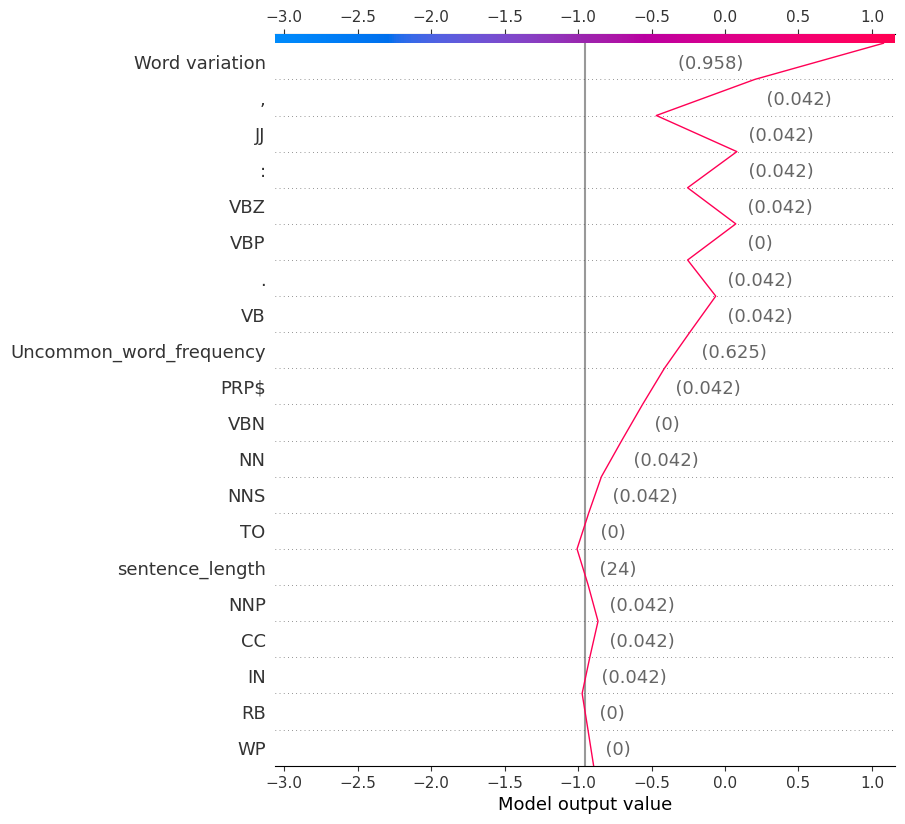

In [67]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


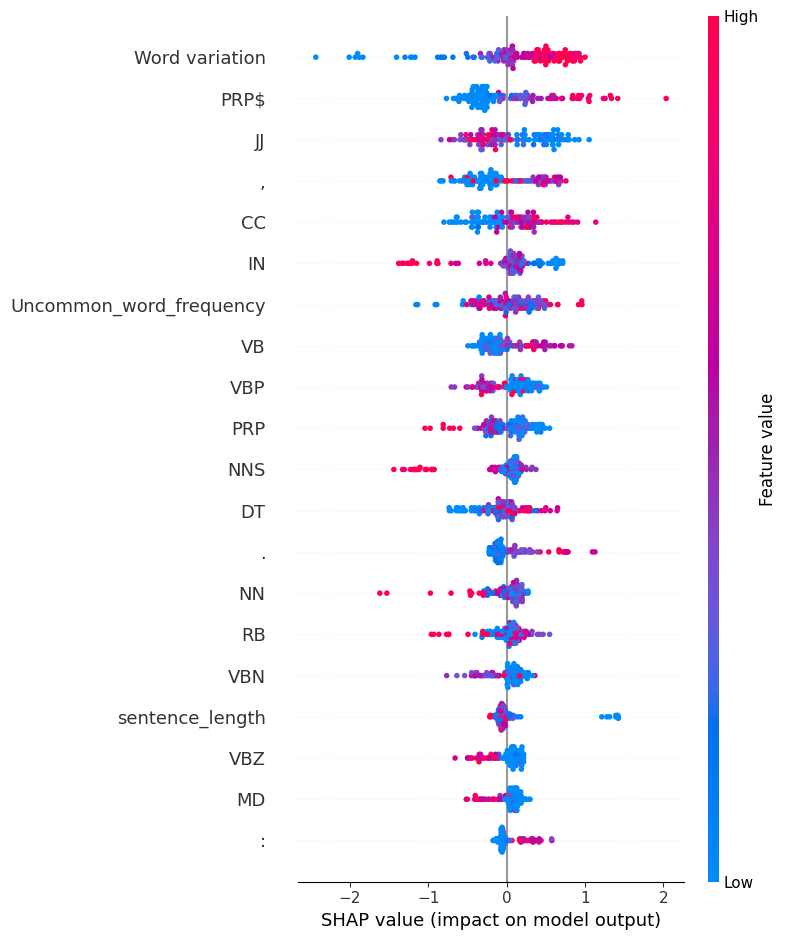

In [68]:
shap.summary_plot(sv_test, X_test)

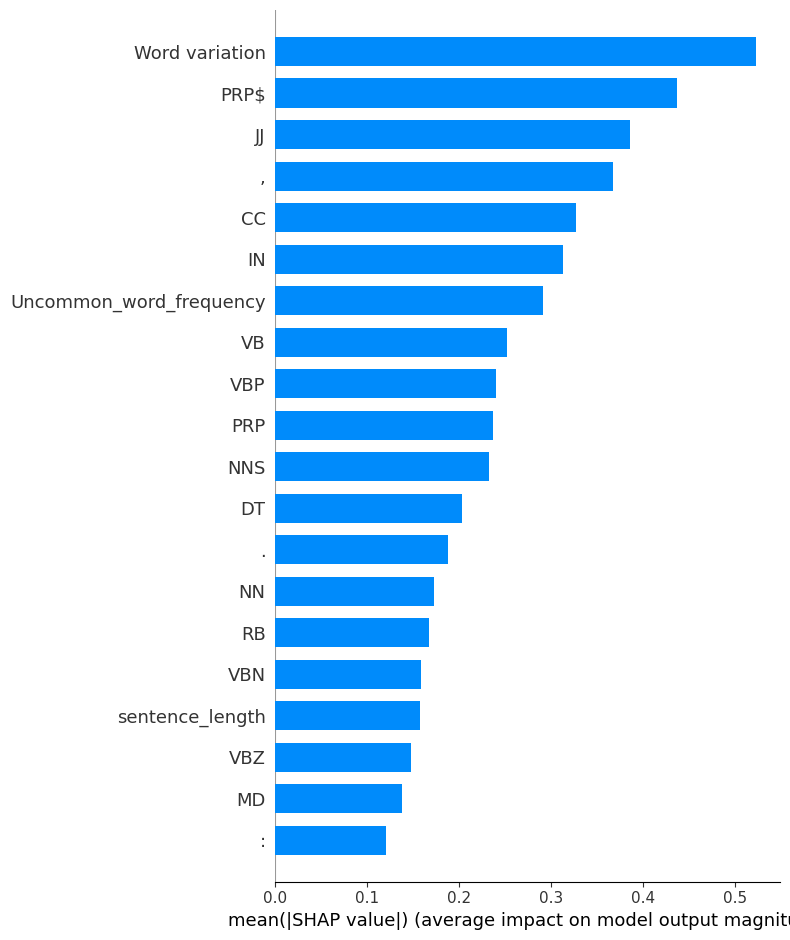

In [69]:
shap.summary_plot(sv_test, X_test, plot_type="bar")